## Setup, Loading Data and CDFs

In [6]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True
DPI=600

In [7]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
CWD = os.getcwd()
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")
np.random.seed(0)

In [8]:
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = sorted([os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)])
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[:6]: 
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    

In [9]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
fine_cdfs_df = all_cdfs_df.copy()
all_cdfs_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 1) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 1) == all_cdfs_df['eta'])]
all_cdfs_df = all_cdfs_df.reset_index(drop=True)
all_cdfs = {x[0] : x[1] for x in all_cdfs_df["(r,eta),cdf"]}
                                             
var_values_dict = dict()
kurt_values_dict = dict()
temp_cdf = all_cdfs_df

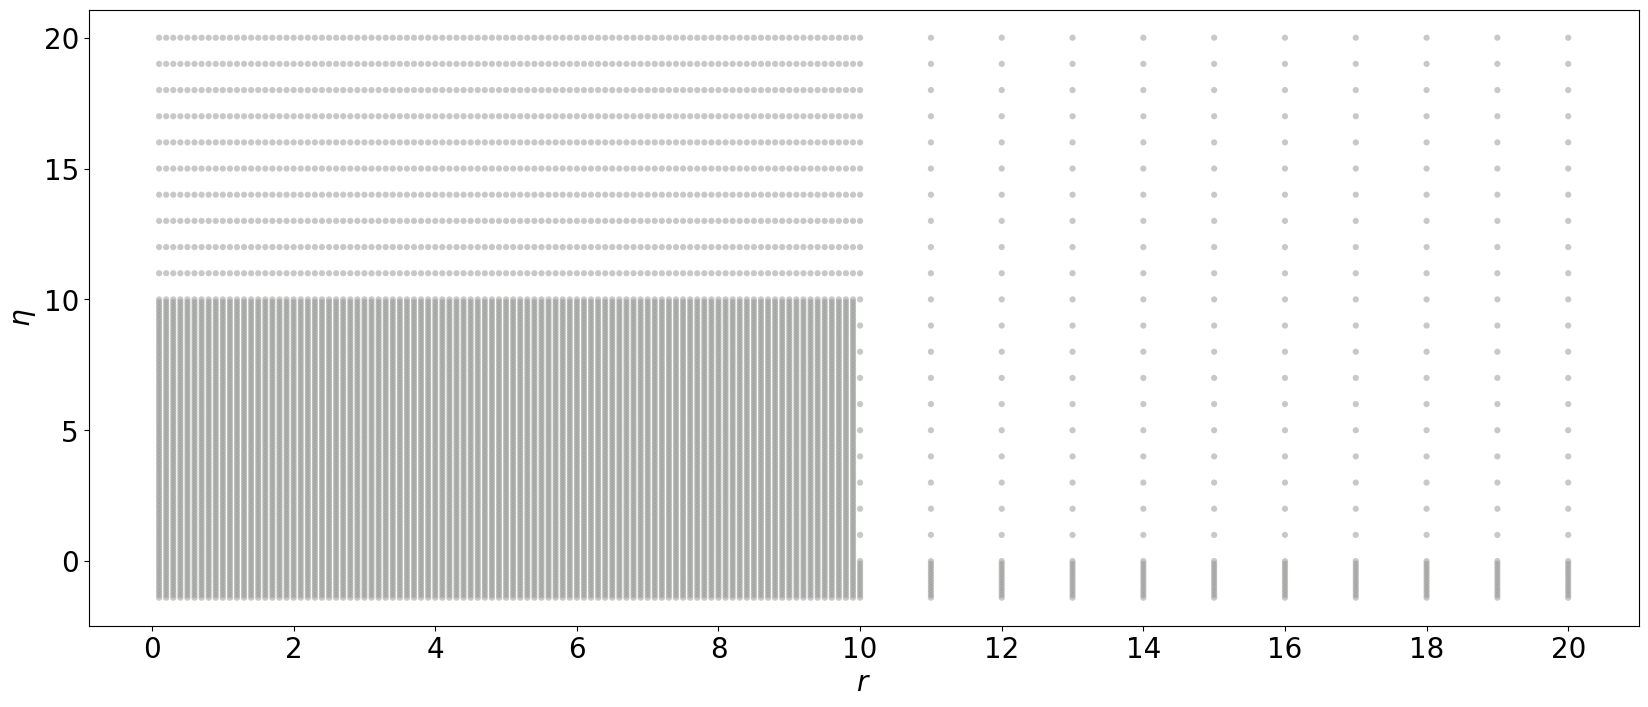

In [10]:
df = all_cdfs_df
fontsize=20

fig, ax = plt.subplots(figsize=(20, 8))

sns.scatterplot(x=df['r'], y=df['eta'], color='xkcd:gray', alpha=0.5, ax=ax, edgecolor='none', s=20)
# ax.set_title(f'Initial Grid ({len(all_cdfs_df)} points)', fontsize=fontsize)

ax.set_xlabel(r'$r$', fontsize=fontsize)
ax.set_ylabel(r'$\eta$', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=fontsize)
# ax.minorticks_on()  # Enable minor ticks
# plt.grid(which='both')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
plt.show()
if SAVE_FIGS:
    save_path = os.path.join(plots_path, "initial_grid.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')
